# Dfs0 - Relative time axis

MIKE IO uses a pandas DatetimeIndex to represent the time dimension in dfs files. If the Dfs file has a relative time axis it will be converted to DatetimeIndex by using 1970-1-1 00:00:00 as start time. 

In [1]:
import mikeio

In [2]:
ds = mikeio.read("../tests/testdata/eq_relative.dfs0")
ds

<mikeio.Dataset>
dims: (time:504)
time: 1970-01-01 00:00:00 - 1970-01-01 00:00:56.237000 (504 non-equidistant records)
items:
  0:  Item 1 <Undefined> (undefined)
  1:  Item 2 <Undefined> (undefined)
  2:  Item 3 <Undefined> (undefined)
  3:  Item 4 <Undefined> (undefined)
  4:  Item 5 <Undefined> (undefined)

In [3]:
df = ds.to_dataframe()
df.head()

,Item 1,Item 2,Item 3,Item 4,Item 5
1970-01-01 00:00:00.000,-0.006862,-0.000611,0.177047,32.484425,-304.720428
1970-01-01 00:00:00.112,-0.011746,-0.000611,0.189257,32.292774,-308.553406
1970-01-01 00:00:00.224,-0.006862,-0.000611,0.189257,32.292774,-308.553406
1970-01-01 00:00:00.335,-0.001978,0.004273,0.189257,32.292774,-300.887482
1970-01-01 00:00:00.447,0.002906,0.009157,0.177047,32.292774,-300.887482


Correcing the dataframe index by subtracting start time to get relative time axis.

In [4]:
df.index = (df.index - df.index[0]).total_seconds()
df.index.name = "Relative time (s)"

In [5]:
df.head()

,Item 1,Item 2,Item 3,Item 4,Item 5
Relative time (s),,,,,
0.000,-0.006862,-0.000611,0.177047,32.484425,-304.720428
0.112,-0.011746,-0.000611,0.189257,32.292774,-308.553406
0.224,-0.006862,-0.000611,0.189257,32.292774,-308.553406
0.335,-0.001978,0.004273,0.189257,32.292774,-300.887482
0.447,0.002906,0.009157,0.177047,32.292774,-300.887482


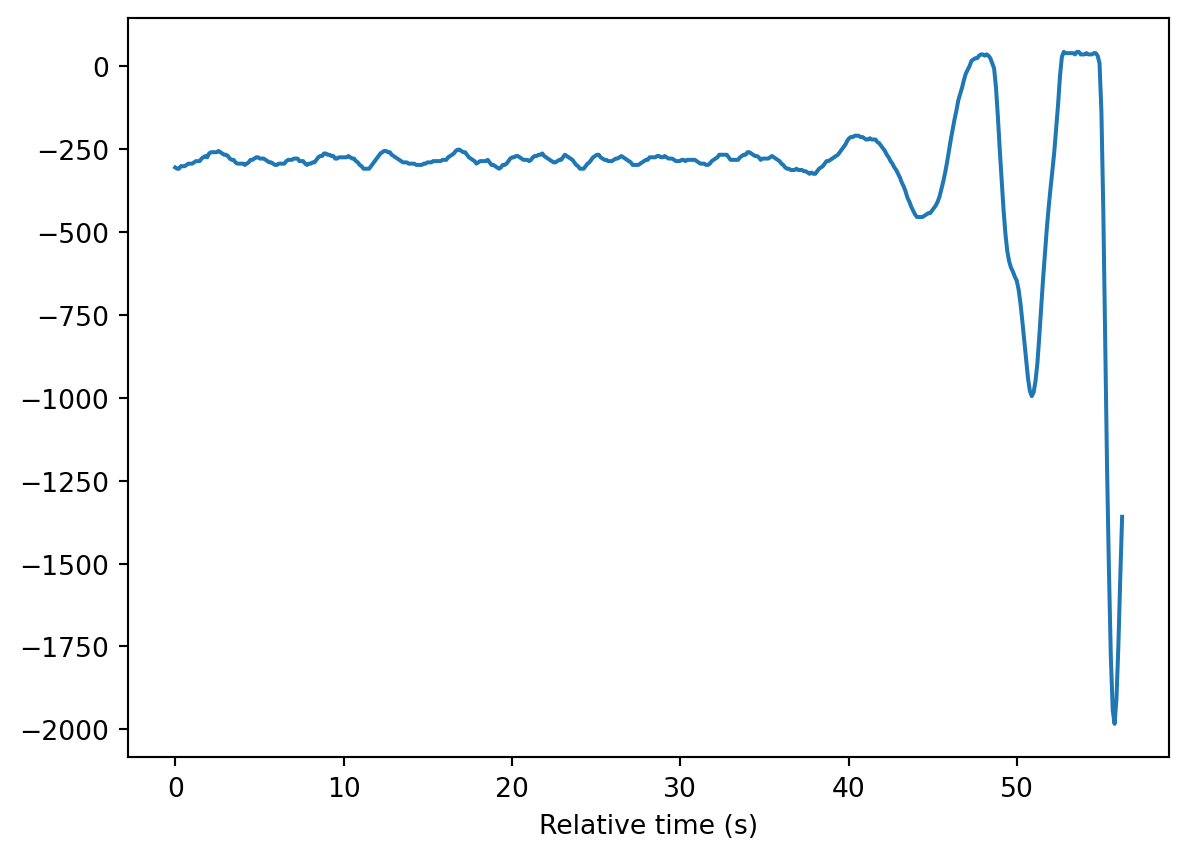

In [6]:
df['Item 5'].plot();